In [19]:
import numpy as np
import re
import glob
import codecs
import os
import matplotlib.pyplot as plt

import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV



### text import

In [2]:

path = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_60'

data_list = []

data_path = glob.glob(path + '/*.txt')

# data_path => sorting by number

data_path = sorted(data_path, key=lambda i : int(os.path.splitext(os.path.basename(i))[0]))

# data import

for file in range(len(data_path)):
    with codecs.open(data_path[file], 'r', encoding = 'utf-8',
                    errors = 'ignore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\r\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                    str(open_text.strip()))
        data_list.append(open_text)
        
        

### 형태소 분리

In [3]:

t = Okt()

data_token = [t.morphs(row) for row in data_list]


# 토큰을 다시 한 문장으로 만들기

data_sentence = []

for content in data_token:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    data_sentence.append(sentence)


### CountVector

In [40]:
counter = CountVectorizer()

counter.fit(data_token[0])




    

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Vectorizer

In [4]:
vectorizer = TfidfVectorizer(min_df = 3, ngram_range = (1,2))

data_set = vectorizer.fit_transform(data_sentence)

### Test split

In [8]:

target = [0]* 20 + [1] * 20

data_set = data_set.toarray(order = None, out = None)

x_train, x_test, y_train, y_test = train_test_split(data_set, target, test_size = 0.2, random_state = 42)


### pipe line / StandardScaler

In [9]:
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### PCA

In [10]:
pca = PCA(n_components = 3)

x_train2 = pca.fit_transform(x_train)
x_test2 = pca.transform(x_test)

### Graph

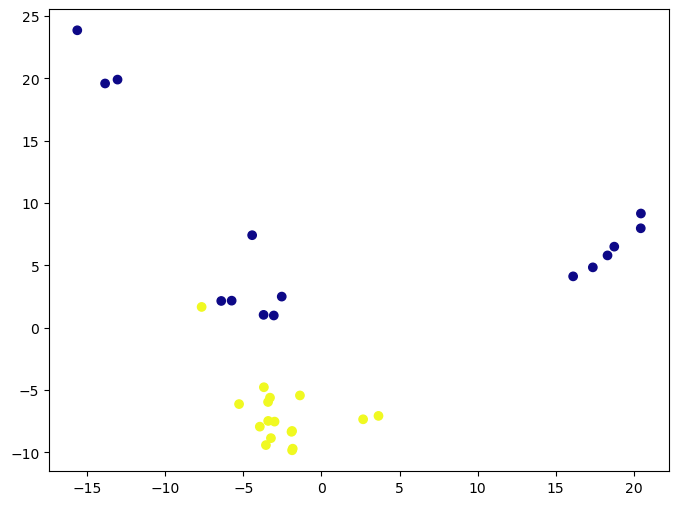

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(x_train2[:,0], x_train2[:,1], c = y_train, cmap = 'plasma')

### 특성별 최소, 최대 스케일링

In [15]:
min_on_training = x_train2.min(axis = 0)

range_on_training = (x_train2 - min_on_training).max(axis = 0)

x_train_scaled = (x_train2 - min_on_training) / range_on_training
x_test_scaled = (x_test2 - min_on_training) / range_on_training


### GridSearchCV

In [16]:
# param_grid = {'C': [0.01,0.1,0.5,1,10,100],
#              'gamma': [1,0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
#              'kernel' : ['rbf','poly''linear']}


# grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, refit = True, verbose = 1)


              
# grid.fit(x_train_scaled,y_train)
              
# grid.best_params_

### svm fit

In [17]:
svm_clf2 = SVC(C = 5, gamma = 1, kernel = 'linear', probability = True, random_state = 42)

svm_clf2.fit(x_train_scaled,y_train)

SVC(C=5, gamma=1, kernel='linear', probability=True, random_state=42)

### Score

In [18]:
print("train ", svm_clf2.score(x_train_scaled, y_train))
print("test ", svm_clf2.score(x_test_scaled,y_test))

train  0.96875
test  1.0
